# 이탈 예측모형

## *1*. 환경 설정

### 1.1 분석에 필요한 library 호출 및 google drive 연결

In [1]:
# 분석에 사용할 패키지 로딩
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn as sk

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay

import xgboost as xgb

In [2]:
# pandas 옵션 모든 컬럼 표시
pd.set_option('display.max_columns', None)
pd.set_option('display.max_seq_items', None)
# pd.set_option('display.max_rows', None)

# 그래프 스타일 선택
plt.style.use('ggplot')

# 그래프 바로 보기
%matplotlib inline

In [3]:
# 구글 드라이브에 있는  데이터셋 연결을 위한 구글드라이브 세팅
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## *2*. 데이터 불러오기 및 확인

### 2.1 데이터 불러오기 및 데이터 확인

In [4]:
# 파일의 위치는 내 구글드라이브 연결후 실습 파일을 선택하고 "..." 클릭하여 "경로복사"를 하여 붙여 넣으시면 됩니다.
data = pd.read_csv('/content/drive/MyDrive/[러닝스푼즈] CRM 프로젝트/[러닝스푼즈]CRM머신러닝 프로젝트_4기/5주차_이탈예측/Cell2Cell_NA.csv')
data.head() # 처음 5개 데이터 확인

,REVENUE,MOU,RECCHRGE,DIRECTAS,OVERAGE,ROAM,CHANGEM,CHANGER,DROPVCE,BLCKVCE,UNANSVCE,CUSTCARE,THREEWAY,MOUREC,OUTCALLS,INCALLS,PEAKVCE,OPEAKVCE,DROPBLK,CALLFWDV,CALLWAIT,CHURN,MONTHS,UNIQSUBS,ACTVSUBS,CSA,PHONES,MODELS,EQPDAYS,CUSTOMER,AGE1,AGE2,CHILDREN,CREDITA,CREDITAA,CREDITB,CREDITC,CREDITDE,CREDITGY,CREDITZ,PRIZMRUR,PRIZMUB,PRIZMTWN,REFURB,WEBCAP,TRUCK,RV,OCCPROF,OCCCLER,OCCCRFT,OCCSTUD,OCCHMKR,OCCRET,OCCSELF,OWNRENT,MARRYUN,MARRYYES,MARRYNO,MAILORD,MAILRES,MAILFLAG,TRAVEL,PCOWN,CREDITCD,RETCALLS,RETACCPT,NEWCELLY,NEWCELLN,REFER,INCMISS,INCOME,MCYCLE,CREDITAD,SETPRCM,SETPRC,RETCALL,CALIBRAT,CHURNDEP
0,57.49,482.75,37.43,0.25,22.75,0.0,532.25,50.99,8.33,1.00,61.33,1.67,0.33,55.28,46.33,6.33,83.67,157.00,9.33,0.0,5.67,0,56,1,1,MILMIL414,7.0,6.0,240.0,1000002,30.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,5,0,1,0,149.99,0,0,NaN
1,82.28,1312.25,75.00,1.24,0.00,0.0,156.75,8.14,52.00,7.67,76.00,4.33,1.33,200.32,370.33,147.00,555.67,303.67,59.67,0.0,22.67,0,59,2,2,PITHOM412,9.0,4.0,458.0,1000006,30.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,6,0,0,0,9.99,0,0,NaN
2,31.66,25.50,29.99,0.25,0.00,0.0,59.50,4.03,0.00,1.00,2.33,0.00,0.00,0.00,0.00,0.00,1.67,1.67,1.00,0.0,0.00,0,57,2,2,OKCTUL918,2.0,2.0,601.0,1000010,52.0,58.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,9,0,1,0,29.99,0,0,NaN
3,62.13,97.50,65.98,2.48,0.00,0.0,23.50,6.82,0.00,0.33,4.00,4.00,0.00,0.00,3.67,0.00,7.67,7.33,0.33,0.0,0.00,0,59,2,2,OKCOKC405,3.0,3.0,464.0,1000011,46.0,46.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,6,0,0,0,29.99,0,0,NaN
4,25.22,2.50,25.00,0.00,0.00,0.0,-2.50,-0.23,0.00,0.00,0.33,0.00,0.00,1.13,0.33,0.00,0.67,0.67,0.00,0.0,0.00,0,53,2,2,SANMCA210,2.0,2.0,354.0,1000014,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7,0,0,0,29.99,0,0,NaN


In [5]:
data.tail() # 마지막 5개 데이터 확인

,REVENUE,MOU,RECCHRGE,DIRECTAS,OVERAGE,ROAM,CHANGEM,CHANGER,DROPVCE,BLCKVCE,UNANSVCE,CUSTCARE,THREEWAY,MOUREC,OUTCALLS,INCALLS,PEAKVCE,OPEAKVCE,DROPBLK,CALLFWDV,CALLWAIT,CHURN,MONTHS,UNIQSUBS,ACTVSUBS,CSA,PHONES,MODELS,EQPDAYS,CUSTOMER,AGE1,AGE2,CHILDREN,CREDITA,CREDITAA,CREDITB,CREDITC,CREDITDE,CREDITGY,CREDITZ,PRIZMRUR,PRIZMUB,PRIZMTWN,REFURB,WEBCAP,TRUCK,RV,OCCPROF,OCCCLER,OCCCRFT,OCCSTUD,OCCHMKR,OCCRET,OCCSELF,OWNRENT,MARRYUN,MARRYYES,MARRYNO,MAILORD,MAILRES,MAILFLAG,TRAVEL,PCOWN,CREDITCD,RETCALLS,RETACCPT,NEWCELLY,NEWCELLN,REFER,INCMISS,INCOME,MCYCLE,CREDITAD,SETPRCM,SETPRC,RETCALL,CALIBRAT,CHURNDEP
71042,117.49,384.0,29.99,0.0,250.0,0.0,0.0,0.0,4.00,1.00,27.00,0.00,0.00,21.70,1.33,0.00,99.33,54.33,5.0,0.0,0.00,1,30,1,1,LAXDOW562,2.0,2.0,489.0,1099987,22.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,29.99,0,1,1.0
71043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,2.00,1.67,0.0,0.0,0.00,1,25,1,1,LAXRIV909,1.0,1.0,773.0,1099988,34.0,26.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,6,0,0,1,0.00,0,1,1.0
71044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.33,2.67,48.33,0.00,0.00,58.92,17.00,1.33,160.33,33.33,12.0,0.0,0.33,1,29,1,1,LAXSFN818,2.0,2.0,526.0,1099990,68.0,64.0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,6,0,0,0,59.99,0,1,1.0
71045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,1.32,0.67,0.33,5.33,3.33,0.0,0.0,0.00,1,25,1,1,LAXCOR909,1.0,1.0,773.0,1099992,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,8,0,1,1,0.00,0,1,1.0
71046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.67,4.33,287.00,1.33,13.67,1225.28,430.33,87.67,1359.00,910.33,76.0,0.0,6.67,1,25,1,1,LAXCDG310,3.0,2.0,378.0,1099995,36.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,7,0,1,0,79.99,0,1,1.0


In [6]:
# 전체 데이터 모양 확인
data.shape

(71047, 78)

In [7]:
# 각 컬럼별 유형 확인
type(data.info())

##

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71047 entries, 0 to 71046
Data columns (total 78 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   REVENUE   70831 non-null  float64
 1   MOU       70831 non-null  float64
 2   RECCHRGE  70831 non-null  float64
 3   DIRECTAS  70831 non-null  float64
 4   OVERAGE   70831 non-null  float64
 5   ROAM      70831 non-null  float64
 6   CHANGEM   70545 non-null  float64
 7   CHANGER   70545 non-null  float64
 8   DROPVCE   71047 non-null  float64
 9   BLCKVCE   71047 non-null  float64
 10  UNANSVCE  71047 non-null  float64
 11  CUSTCARE  71047 non-null  float64
 12  THREEWAY  71047 non-null  float64
 13  MOUREC    71047 non-null  float64
 14  OUTCALLS  71047 non-null  float64
 15  INCALLS   71047 non-null  float64
 16  PEAKVCE   71047 non-null  float64
 17  OPEAKVCE  71047 non-null  float64
 18  DROPBLK   71047 non-null  float64
 19  CALLFWDV  71047 non-null  float64
 20  CALLWAIT  71047 non-null  fl

NoneType

### 2.2 데이터셋트 분리 및 타겟 확인

In [8]:
# 학습 및 테스트 데이터 세트 확인
pd.concat ([data['CHURNDEP'].value_counts(dropna= False),
            data['CHURNDEP'].value_counts(dropna= False, normalize= True)*100],
            axis = 1)

## NaN의 비율이 43.6%
## 0과 1의 비율이 각각 28.1%

,count,proportion
CHURNDEP,,
NaN,31047,43.699241
0.0,20000,28.150379
1.0,20000,28.150379


In [9]:
# Target 비율 확인
pd.concat([data['CHURN'].value_counts(dropna= False),
           data['CHURN'].value_counts(dropna= False, normalize = True) *100],
          axis = 1)

## 1 (이탈) 비율이 전체 29.0%
## 0 (유지) 비율이 전체 70.9%

,count,proportion
CHURN,,
0,50438,70.992442
1,20609,29.007558


In [10]:
# 데이터 세트 구분 및 target 비율 같이 보기
pd.concat(
    [data[['CHURNDEP','CHURN']].value_counts(dropna= False, sort = False),
     data[['CHURNDEP','CHURN']].value_counts(dropna= False, sort = False, normalize =True)*100],
     axis = 1)


count  proportion
CHURNDEP CHURN                   
0.0      0      20000   28.150379
1.0      1      20000   28.150379
NaN      0      30438   42.842062
         1        609    0.857179

In [11]:
# 테스트 데이터 셋트의 CHURN 비율 확인

data[pd.isnull(data['CHURNDEP'])].CHURN.value_counts(normalize =True)

CHURN
0    0.980385
1    0.019615
Name: proportion, dtype: float64

학습 데이터   : CHURNDEP가 0 or 1 -> 4만, 전체 56.3%
- label  비율 50 : 50  (balancing)

테스트 데이터 : CHURNDEP가 NaN    -> 3.1만, 43.7%
- label  비율 98 : 2 (실제 비율)

## *3*. Null값 확인 및 처리



### 3.1 Null 값 확인

In [12]:
# data 에 포함된  Null 값 수 확인
print(data.isnull().sum().sum())

print(data.isnull().sum().sum()/data.shape[0])

## 35,866 건 , 약 50%

35866
0.5048207524596394


In [13]:
# Null 값이 있는 변수 확인
pd.set_option('display.max_rows', None)  # 변수 리스트 전체 보려고

data.isnull().sum()

## REVENUE, MOU, RECCHRGE, DIRECTAS, OVERAGE, ROAM : 각 216개
## CHANGEM, CHANGER : 각 502개
## PHONE, MODELS, EQPDAYS : 각 1개
## CSA : 28개
## AGE1 ,AGE2 : 1,244
## CHURNDEP : 31,047개

REVENUE       216
MOU           216
RECCHRGE      216
DIRECTAS      216
OVERAGE       216
ROAM          216
CHANGEM       502
CHANGER       502
DROPVCE         0
BLCKVCE         0
UNANSVCE        0
CUSTCARE        0
THREEWAY        0
MOUREC          0
OUTCALLS        0
INCALLS         0
PEAKVCE         0
OPEAKVCE        0
DROPBLK         0
CALLFWDV        0
CALLWAIT        0
CHURN           0
MONTHS          0
UNIQSUBS        0
ACTVSUBS        0
CSA            28
PHONES          1
MODELS          1
EQPDAYS         1
CUSTOMER        0
AGE1         1244
AGE2         1244
CHILDREN        0
CREDITA         0
CREDITAA        0
CREDITB         0
CREDITC         0
CREDITDE        0
CREDITGY        0
CREDITZ         0
PRIZMRUR        0
PRIZMUB         0
PRIZMTWN        0
REFURB          0
WEBCAP          0
TRUCK           0
RV              0
OCCPROF         0
OCCCLER         0
OCCCRFT         0
OCCSTUD         0
OCCHMKR         0
OCCRET          0
OCCSELF         0
OWNRENT         0
MARRYUN   

In [14]:
# Null 값이 있는 변수 확인
data.columns[data.isnull().sum()>0]

## 'CHURNDEP'는 Null 값이 테스트 데이터로 의미있는 Null 값으로 제외하고 다시 Null 값 확인

Index(['REVENUE', 'MOU', 'RECCHRGE', 'DIRECTAS', 'OVERAGE', 'ROAM', 'CHANGEM',
       'CHANGER', 'CSA', 'PHONES', 'MODELS', 'EQPDAYS', 'AGE1', 'AGE2',
       'CHURNDEP'],
      dtype='object')

In [15]:
# 학습과 테스트를 구분하는 변수를 제외한 Null 값수
data.iloc[:,:77].isnull().sum().sum()

## 4,819 건

4819

In [16]:
# REVENUE 가 NULL 값인것 확인해보기
data[pd.isnull(data['REVENUE'])].iloc[:,:77].isnull().sum()

## REVENUE, MOU, RECCHRGE, DIRECTAS, OVERAGE, ROAM, CHANGEM, CHANGER  8개 컬럼은 하나의 값이 Null 값이면 모두 Null 값
## Null 값이 의미가 있는 Null 인가? Null이 나올 수 있나?
## Yes 일시정지 같은경우 Null 이 나올 수 있고, 이는 0 을 의미함

REVENUE     216
MOU         216
RECCHRGE    216
DIRECTAS    216
OVERAGE     216
ROAM        216
CHANGEM     216
CHANGER     216
DROPVCE       0
BLCKVCE       0
UNANSVCE      0
CUSTCARE      0
THREEWAY      0
MOUREC        0
OUTCALLS      0
INCALLS       0
PEAKVCE       0
OPEAKVCE      0
DROPBLK       0
CALLFWDV      0
CALLWAIT      0
CHURN         0
MONTHS        0
UNIQSUBS      0
ACTVSUBS      0
CSA           0
PHONES        0
MODELS        0
EQPDAYS       0
CUSTOMER      0
AGE1          6
AGE2          6
CHILDREN      0
CREDITA       0
CREDITAA      0
CREDITB       0
CREDITC       0
CREDITDE      0
CREDITGY      0
CREDITZ       0
PRIZMRUR      0
PRIZMUB       0
PRIZMTWN      0
REFURB        0
WEBCAP        0
TRUCK         0
RV            0
OCCPROF       0
OCCCLER       0
OCCCRFT       0
OCCSTUD       0
OCCHMKR       0
OCCRET        0
OCCSELF       0
OWNRENT       0
MARRYUN       0
MARRYYES      0
MARRYNO       0
MAILORD       0
MAILRES       0
MAILFLAG      0
TRAVEL        0
PCOWN   

In [17]:
data[pd.isnull(data['AGE1'])].iloc[:,:77].isnull().sum()

## AGE1이 NULL인것을 살펴보니 6개 row는 Null 값이 계속 같이 있는 유저임 -> 이 유저는 분석에 삭제 !!!

REVENUE        6
MOU            6
RECCHRGE       6
DIRECTAS       6
OVERAGE        6
ROAM           6
CHANGEM        9
CHANGER        9
DROPVCE        0
BLCKVCE        0
UNANSVCE       0
CUSTCARE       0
THREEWAY       0
MOUREC         0
OUTCALLS       0
INCALLS        0
PEAKVCE        0
OPEAKVCE       0
DROPBLK        0
CALLFWDV       0
CALLWAIT       0
CHURN          0
MONTHS         0
UNIQSUBS       0
ACTVSUBS       0
CSA            0
PHONES         0
MODELS         0
EQPDAYS        0
CUSTOMER       0
AGE1        1244
AGE2        1244
CHILDREN       0
CREDITA        0
CREDITAA       0
CREDITB        0
CREDITC        0
CREDITDE       0
CREDITGY       0
CREDITZ        0
PRIZMRUR       0
PRIZMUB        0
PRIZMTWN       0
REFURB         0
WEBCAP         0
TRUCK          0
RV             0
OCCPROF        0
OCCCLER        0
OCCCRFT        0
OCCSTUD        0
OCCHMKR        0
OCCRET         0
OCCSELF        0
OWNRENT        0
MARRYUN        0
MARRYYES       0
MARRYNO        0
MAILORD       

In [18]:
data[pd.isnull(data['CSA'])].iloc[:,:77].isnull().sum()
## CSA 는 NULL 값이 다른 변수의 Null값과 겹치지 않음.

REVENUE      0
MOU          0
RECCHRGE     0
DIRECTAS     0
OVERAGE      0
ROAM         0
CHANGEM      0
CHANGER      0
DROPVCE      0
BLCKVCE      0
UNANSVCE     0
CUSTCARE     0
THREEWAY     0
MOUREC       0
OUTCALLS     0
INCALLS      0
PEAKVCE      0
OPEAKVCE     0
DROPBLK      0
CALLFWDV     0
CALLWAIT     0
CHURN        0
MONTHS       0
UNIQSUBS     0
ACTVSUBS     0
CSA         28
PHONES       0
MODELS       0
EQPDAYS      0
CUSTOMER     0
AGE1         0
AGE2         0
CHILDREN     0
CREDITA      0
CREDITAA     0
CREDITB      0
CREDITC      0
CREDITDE     0
CREDITGY     0
CREDITZ      0
PRIZMRUR     0
PRIZMUB      0
PRIZMTWN     0
REFURB       0
WEBCAP       0
TRUCK        0
RV           0
OCCPROF      0
OCCCLER      0
OCCCRFT      0
OCCSTUD      0
OCCHMKR      0
OCCRET       0
OCCSELF      0
OWNRENT      0
MARRYUN      0
MARRYYES     0
MARRYNO      0
MAILORD      0
MAILRES      0
MAILFLAG     0
TRAVEL       0
PCOWN        0
CREDITCD     0
RETCALLS     0
RETACCPT     0
NEWCELLY  

In [19]:
data[pd.isnull(data['PHONES'])].iloc[:,:77].isnull().sum()
## PHONES  Null 값인경우 기기 정보인 MODEL, DQPDAYS외에 다른 변수의 null 값과 겹치지 않음.-> NULL  값 삭제

pd.set_option('display.max_rows', 30)  # pandas 시각화 옵션 원상태로

### 3.2 Null 값 제거 및 대체

In [20]:
# AGE 와 PHONES CSA NULL 값 제거
null_index = data[(data['AGE1'].isnull()) | (data['PHONES'].isnull()) | (data['CSA'].isnull()) ].index

print(len(null_index))

data_na_treat = data.drop(null_index)
data_na_treat.shape

1273


(69774, 78)

In [21]:
# null 값 대체  사용 요금 및 금액 부분 변수는 0으로 대체

data_na_treat['REVENUE'] = data_na_treat['REVENUE'].fillna(0)
data_na_treat['MOU'] = data_na_treat['MOU'].fillna(0)
data_na_treat['RECCHRGE'] = data_na_treat['RECCHRGE'].fillna(0)
data_na_treat['DIRECTAS'] = data_na_treat['DIRECTAS'].fillna(0)
data_na_treat['OVERAGE'] = data_na_treat['OVERAGE'].fillna(0)
data_na_treat['ROAM'] = data_na_treat['ROAM'].fillna(0)
data_na_treat['CHANGEM'] = data_na_treat['CHANGEM'].fillna(0)
data_na_treat['CHANGER'] = data_na_treat['CHANGER'].fillna(0)

# 학습 테스트 변수를 제외한 나머지 변수에 Null 값이 있는지 확인
data_na_treat.iloc[:,0:77].isnull().sum().sum()

0

## 4.EDA


### 4.1 연속형 데이터 탐색

In [22]:
n_bins = 10
data_na_treat['bin'] = pd.cut(data_na_treat['REVENUE'],bins = n_bins)

temp_1 = pd.DataFrame(data_na_treat.groupby(['CHURN','bin']).CUSTOMER.count()).reset_index()
temp_1_pivot = temp_1.pivot(index = 'bin',columns = 'CHURN',values = 'CUSTOMER')
temp_1_pivot['row_sum'] = temp_1_pivot.sum(axis=1)
temp_1_pivot[0] = temp_1_pivot[0]/temp_1_pivot['row_sum']
temp_1_pivot[1] = temp_1_pivot[1]/temp_1_pivot['row_sum']

temp_1_pivot

CHURN,0,1,row_sum
bin,,,
"(-7.4, 116.785]",0.709264,0.290736,64636
"(116.785, 239.74]",0.716467,0.283533,4585
"(239.74, 362.695]",0.677725,0.322275,422
"(362.695, 485.65]",0.807229,0.192771,83
"(485.65, 608.605]",0.852941,0.147059,34
"(608.605, 731.56]",0.833333,0.166667,6
"(731.56, 854.515]",0.500000,0.500000,4
"(854.515, 977.47]",0.333333,0.666667,3
"(977.47, 1100.425]",NaN,NaN,0


In [23]:
## 연속형 변수 그래프 생성 함수
def hist_plot (colname, taget_colname, n_bin = 10) : # colname : 그래프 그릴 컬럼명 , taget_colname: n_bin : 구간갯수

  n_bins = int(n_bin)
  data_na_treat['bin'] = pd.cut(data_na_treat[colname],bins = n_bins)

  temp = data_na_treat.reset_index().groupby([taget_colname,'bin']).index.count().reset_index() # 구간화
  temp = temp.pivot(index = 'bin',columns = taget_colname, values = 'index')
  temp['row_sum'] = temp.sum(axis = 1) # 각각의 비율을 만들기 위해 구간 합계 생성
  temp['0_rate'] = temp[0]/temp['row_sum'] #각 row의 0의 비율
  temp['1_rate'] = temp[1]/temp['row_sum'] #각 row의 1의 비율

  ## 그래프
  fig = plt.figure()
  aig, ax = plt.subplots(ncols = 2 , figsize =(12,5))

  ## 첫번째  히스토그램
  sns.histplot(data = data_na_treat, x= colname, hue= taget_colname, bins = n_bins, color=['orange','blue'], alpha  = 0.5, hue_order= (0,1), ax= ax[0])

  ## 구간별 타겟비율 그래프
  temp[['0_rate','1_rate']].plot.bar(stacked = True ,ax= ax[1])
  ax[1].legend(labels=[0,1],title =taget_colname) # 범례 순서 바꾸기
  plt.xlabel(colname)
  plt.show()

In [24]:
# 명속형 변수 그래프 생성 함수
def bar_plot (colname, taget_colname): # colname : 그래프 그릴 컬럼명 , taget_colname: target 컬럼명

## 그래프용 데이터 생성
  temp = data_na_treat.reset_index().groupby([colname,taget_colname]).index.count()
  temp = temp.reset_index()
  temp = temp.pivot(index = colname, columns = taget_colname, values ='index')
  temp['row_sum'] = temp.sum(axis=1)
  temp['0_rate'] = temp[0]/temp['row_sum']
  temp['1_rate'] = temp[1]/temp['row_sum']

## 그래프
  fig = plt.figure()
  aig, ax = plt.subplots(ncols = 2 , figsize =(12,5))
## 빈도 막대 그래프
  temp[[0,1]].plot.bar(stacked = True ,ax= ax[0])
  ax[0].legend(labels=[0,1],title =taget_colname) # 범례 순서 바꾸기
  plt.xlabel(colname)
## 구간별 타겟 비율 막대 그래프
  temp[['0_rate','1_rate']].plot.bar(stacked = True ,ax= ax[1])
  ax[1].legend(labels=[0,1],title =taget_colname) # 범례 순서 바꾸기
  plt.xlabel(colname)
  plt.show()

  print(data_na_treat[colname].value_counts(normalize=True).sort_index())
  print(" ")
  print(pd.crosstab(index = data_na_treat[taget_colname], columns = data_na_treat[colname],margins = True, margins_name ="total",normalize = 'columns'))

<Figure size 640x480 with 0 Axes>

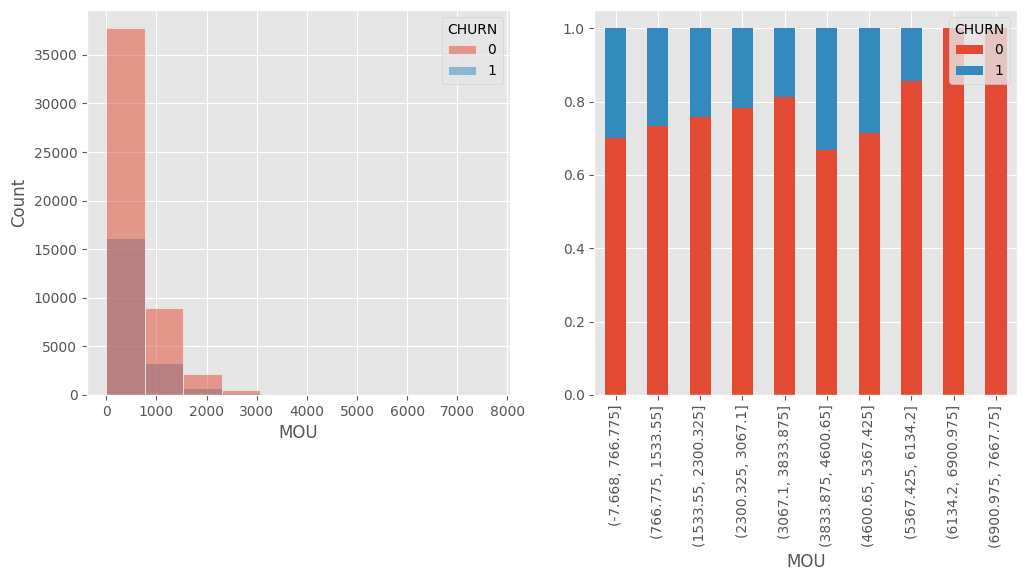

In [51]:
hist_plot('MOU','CHURN',10)

In [26]:
## 연속형 변수 및 명목형 변수 리스 생성
int_colname = []
cat_colname = []
for i in data_na_treat.columns :
  if pd.api.types.is_numeric_dtype(data_na_treat[i]) == True :
    int_colname.append(i)
  elif pd.api.types.is_string_dtype(data_na_treat[i]) == True :
    cat_colname.append(i)
print(int_colname)
print(cat_colname)

['REVENUE', 'MOU', 'RECCHRGE', 'DIRECTAS', 'OVERAGE', 'ROAM', 'CHANGEM', 'CHANGER', 'DROPVCE', 'BLCKVCE', 'UNANSVCE', 'CUSTCARE', 'THREEWAY', 'MOUREC', 'OUTCALLS', 'INCALLS', 'PEAKVCE', 'OPEAKVCE', 'DROPBLK', 'CALLFWDV', 'CALLWAIT', 'CHURN', 'MONTHS', 'UNIQSUBS', 'ACTVSUBS', 'PHONES', 'MODELS', 'EQPDAYS', 'CUSTOMER', 'AGE1', 'AGE2', 'CHILDREN', 'CREDITA', 'CREDITAA', 'CREDITB', 'CREDITC', 'CREDITDE', 'CREDITGY', 'CREDITZ', 'PRIZMRUR', 'PRIZMUB', 'PRIZMTWN', 'REFURB', 'WEBCAP', 'TRUCK', 'RV', 'OCCPROF', 'OCCCLER', 'OCCCRFT', 'OCCSTUD', 'OCCHMKR', 'OCCRET', 'OCCSELF', 'OWNRENT', 'MARRYUN', 'MARRYYES', 'MARRYNO', 'MAILORD', 'MAILRES', 'MAILFLAG', 'TRAVEL', 'PCOWN', 'CREDITCD', 'RETCALLS', 'RETACCPT', 'NEWCELLY', 'NEWCELLN', 'REFER', 'INCMISS', 'INCOME', 'MCYCLE', 'CREDITAD', 'SETPRCM', 'SETPRC', 'RETCALL', 'CALIBRAT', 'CHURNDEP']
['CSA']


<Figure size 640x480 with 0 Axes>

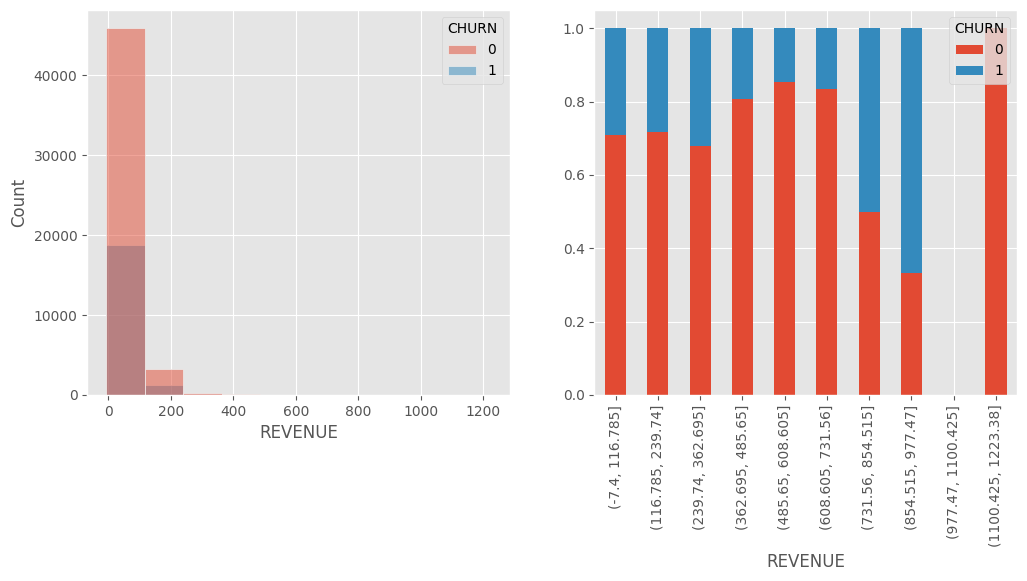

<Figure size 640x480 with 0 Axes>

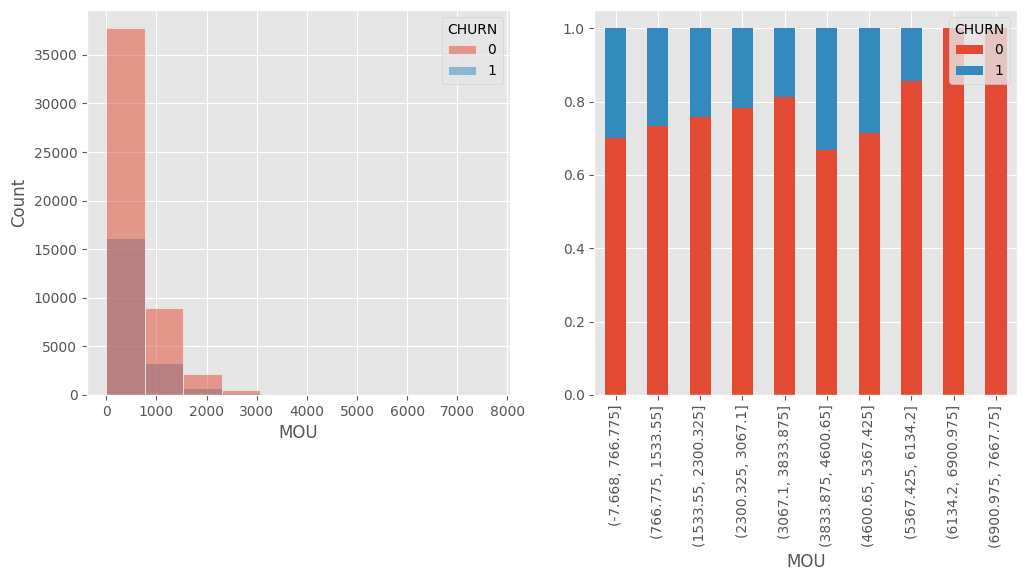

<Figure size 640x480 with 0 Axes>

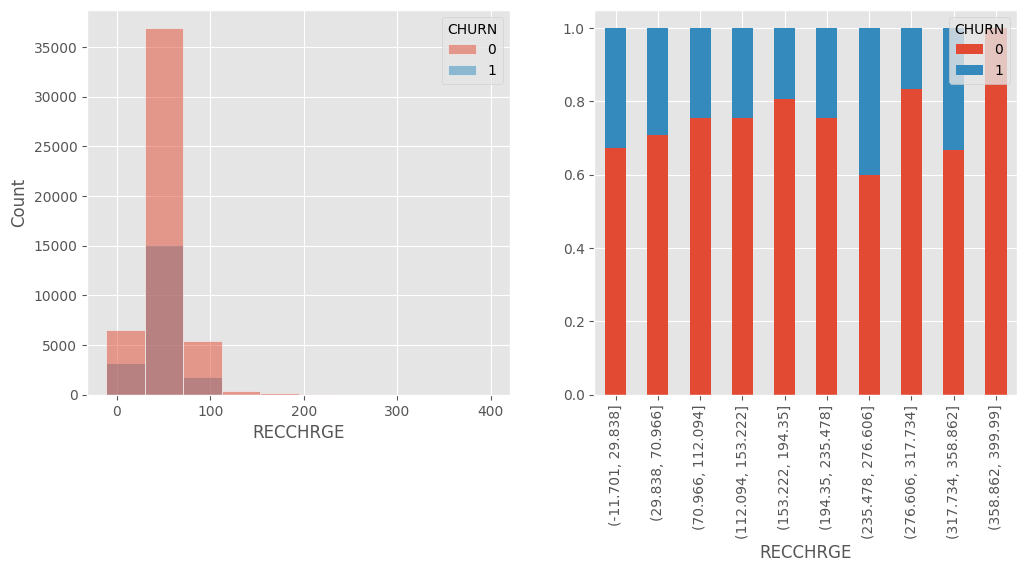

<Figure size 640x480 with 0 Axes>

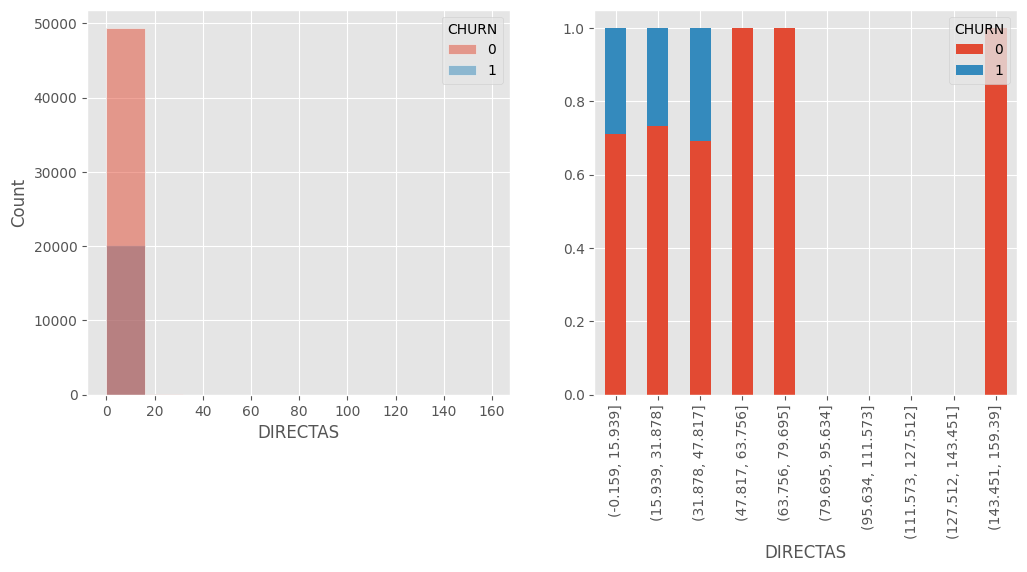

<Figure size 640x480 with 0 Axes>

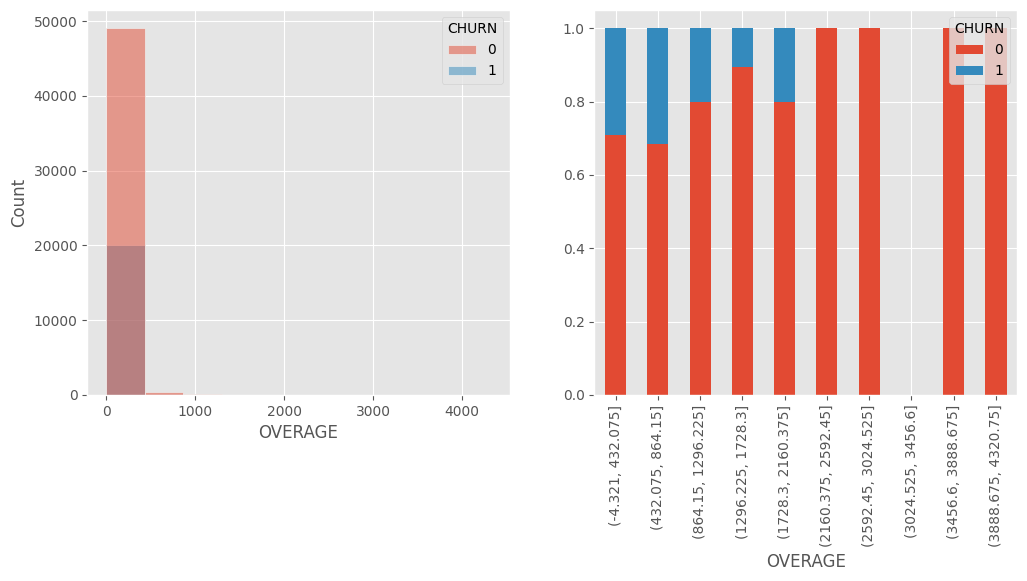

<Figure size 640x480 with 0 Axes>

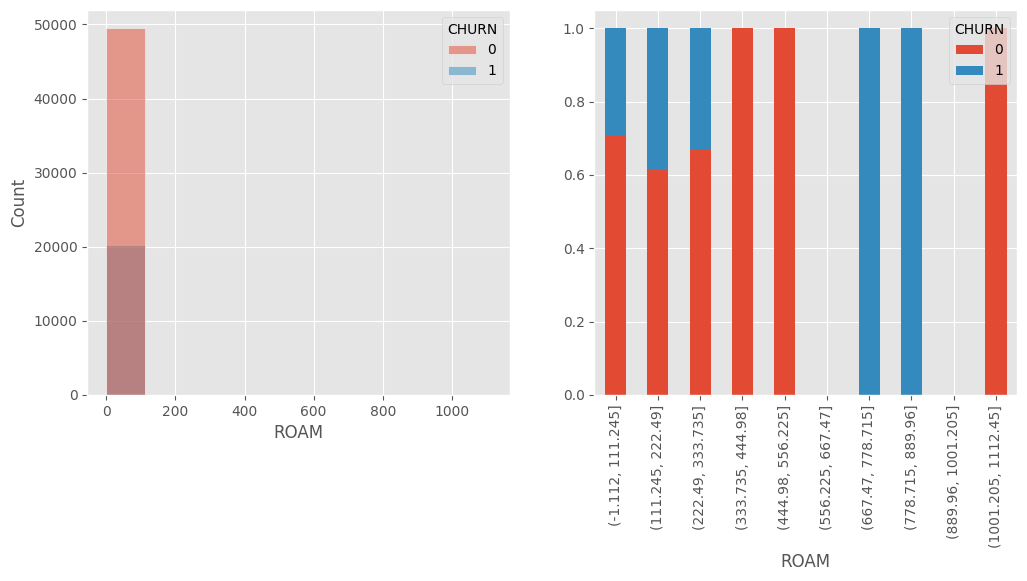

<Figure size 640x480 with 0 Axes>

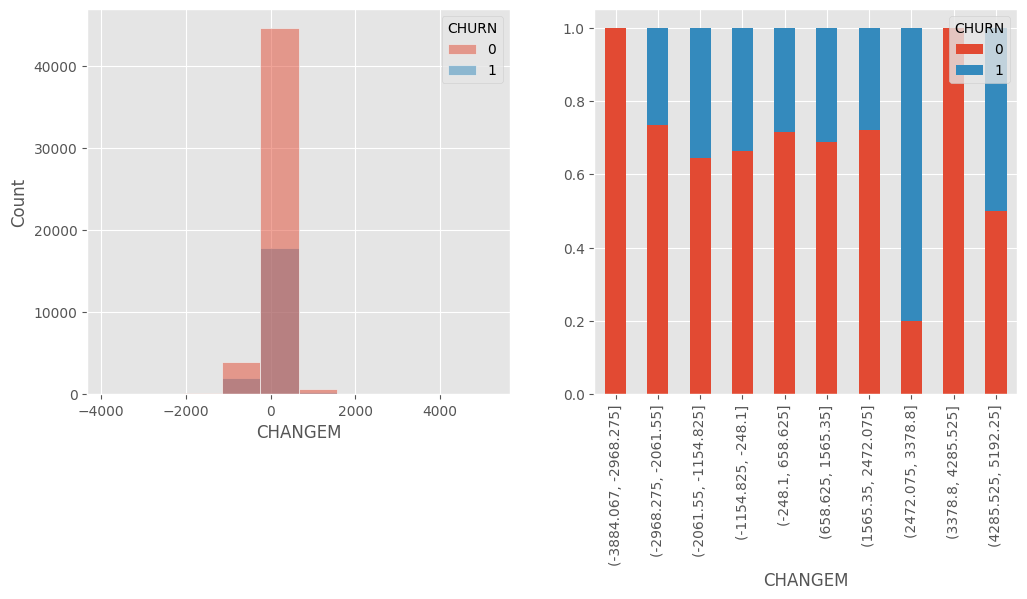

<Figure size 640x480 with 0 Axes>

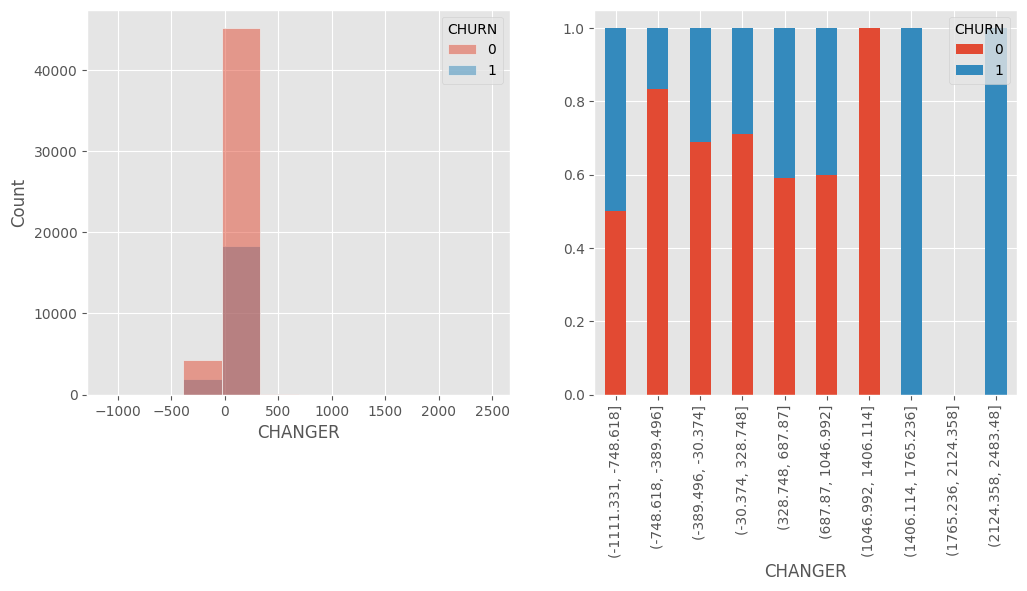

<Figure size 640x480 with 0 Axes>

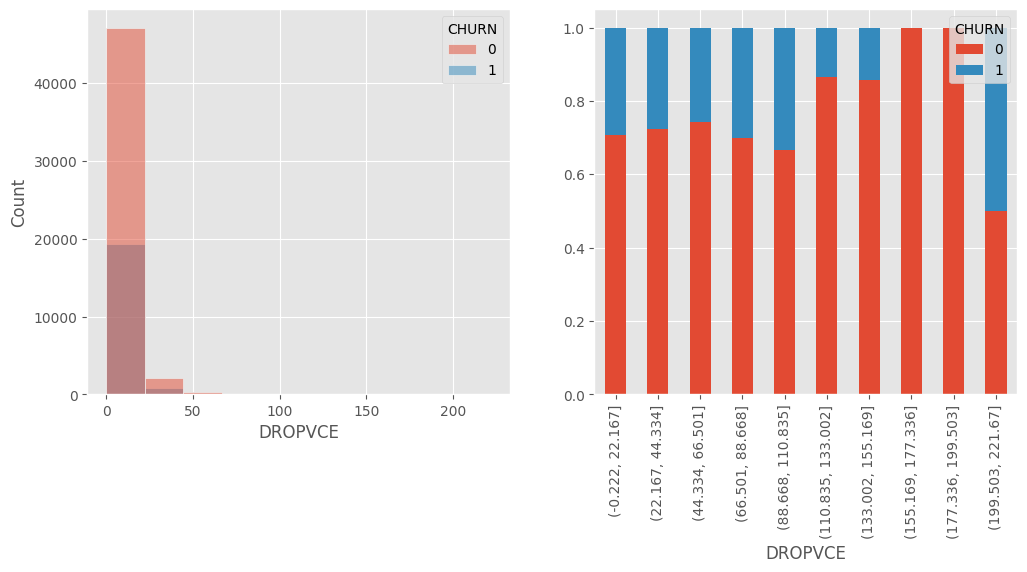

<Figure size 640x480 with 0 Axes>

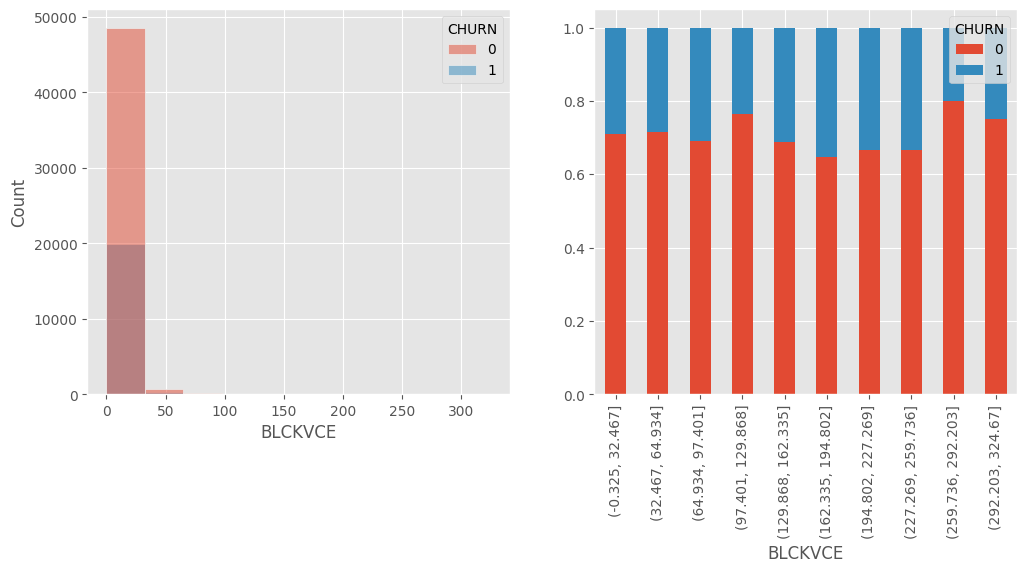

In [27]:
## 연속형 변수 그래프 생성
for i in int_colname[0:10] :
  hist_plot(i,'CHURN',10)

### 4.2 명목형 변수 탐색

<Figure size 640x480 with 0 Axes>

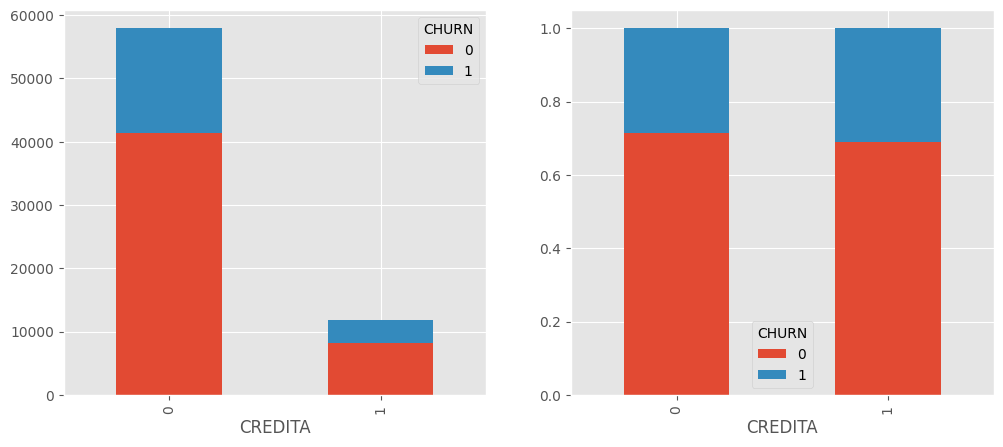

CREDITA
0    0.830223
1    0.169777
Name: proportion, dtype: float64
 
CREDITA         0         1    total
CHURN                               
0        0.713955  0.689009  0.70972
1        0.286045  0.310991  0.29028


In [28]:
bar_plot('CREDITA', 'CHURN')

기본 데이터가 더미 변수로 제공되었기 때문에 이를 다시 하나의 변수로 만들어 막대그래프로 보는것이 좀더 쉽게볼 수 있음.

In [29]:
# 더미변수를 단일 명목형 변수 만들기
data_na_treat.head()

CREDIT =  data_na_treat[['CREDITA','CREDITAA','CREDITB','CREDITC','CREDITDE','CREDITGY','CREDITZ']].stack() #하나의 Series로 쌓기
CREDIT = pd.Series(CREDIT[CREDIT != 0].index.get_level_values(1)) # 0 인값들 제거후 각 인덱스를 값으로
data_na_treat['CREDIT'] = CREDIT.str.replace('CREDIT','')  # 값의 앞에 'CREDIT을 삭제하여 신용등급만 값으로 만들기

data_na_treat['CREDIT'].head(10)  # 데이터 확인

0    DE
1     C
2     A
3     A
4     A
5     C
6     B
7     A
8     A
9     B
Name: CREDIT, dtype: object

In [30]:
data_na_treat['CREDIT'].value_counts() # 분포 확인

CREDIT
AA    25543
A     11663
B     11312
DE     8808
C      7169
Z      2822
GY     1220
Name: count, dtype: int64

<Figure size 640x480 with 0 Axes>

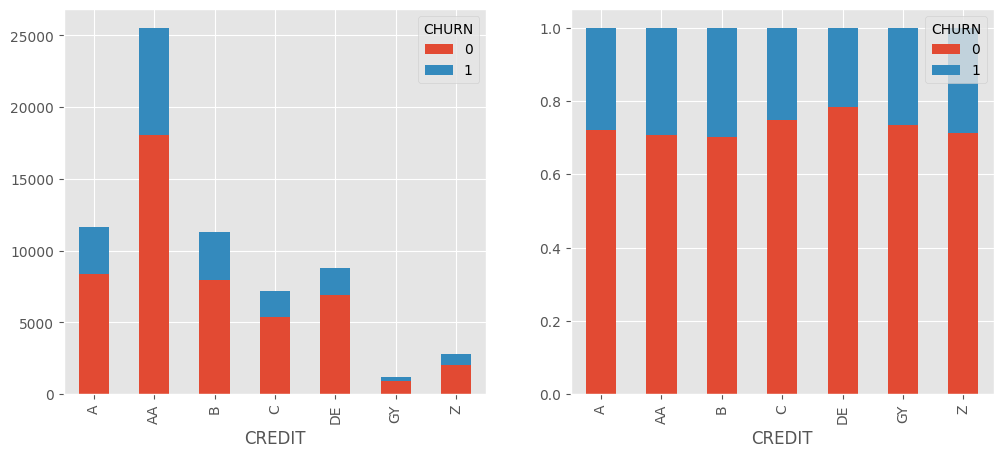

CREDIT
A     0.170171
AA    0.372689
B     0.165050
C     0.104600
DE    0.128515
GY    0.017801
Z     0.041175
Name: proportion, dtype: float64
 
CREDIT         A       AA         B         C       DE        GY         Z  \
CHURN                                                                        
0       0.720055  0.70579  0.701909  0.746548  0.78247  0.735246  0.713324   
1       0.279945  0.29421  0.298091  0.253452  0.21753  0.264754  0.286676   

CREDIT     total  
CHURN             
0       0.722529  
1       0.277471  


In [31]:
bar_plot('CREDIT', 'CHURN')

In [32]:
# 지역정보 확인
# pd.crosstab(data_na_treat['CSA'],data_na_treat['CHURN'],margins= True, normalize= 'columns')
pd.crosstab(data_na_treat['CSA'].str.slice(0,3),data_na_treat['CHURN'],margins= True, normalize= 'columns')

## 주단위로 보더라도 더 비율이 너무 작아 사용하기 어려움

CHURN,0,1,All
CSA,,,
AIR,0.012863,0.012985,0.012899
APC,0.049818,0.043794,0.048069
ATH,0.000485,0.000592,0.000516
ATL,0.036369,0.034709,0.035887
AWI,0.001616,0.000889,0.001405
...,...,...,...
SHE,0.002827,0.002024,0.002594
SLC,0.003130,0.005184,0.003726
SLU,0.000020,0.000000,0.000014


## *5*. 변수 파생 (feature engineering)

In [33]:
# 숫자값을 0과 1로 구분 바꾸기 위한 함수 생성
def over0 (x):
  if x > 0:
    return 1
  else :
    return 0

In [34]:
# 가족수
data_na_treat['FAMILY_CNT']= data_na_treat['AGE1'].apply(over0) + data_na_treat['AGE2'].apply(over0) + data_na_treat['CHILDREN']

# 전체 통화건수
data_na_treat['TOTAL_CALLS'] = data_na_treat['INCALLS'] +data_na_treat['OUTCALLS']

# 추가비용
data_na_treat['OVER_CHARGE'] = data_na_treat['REVENUE'] - data_na_treat['RECCHRGE']

# 추가서비스 사용갯수
data_na_treat['ADDED_SERVICE_CNT']= data_na_treat['THREEWAY'].apply(over0) + data_na_treat['CALLFWDV'].apply(over0) + data_na_treat['CALLWAIT'].apply(over0)

data_na_treat[['FAMILY_CNT','TOTAL_CALLS','OVER_CHARGE','ADDED_SERVICE_CNT']].head()

,FAMILY_CNT,TOTAL_CALLS,OVER_CHARGE,ADDED_SERVICE_CNT
0,1,52.66,20.06,2
1,1,517.33,7.28,2
2,2,0.00,1.67,0
3,3,3.67,-3.85,0
4,0,0.33,0.22,0


<Figure size 640x480 with 0 Axes>

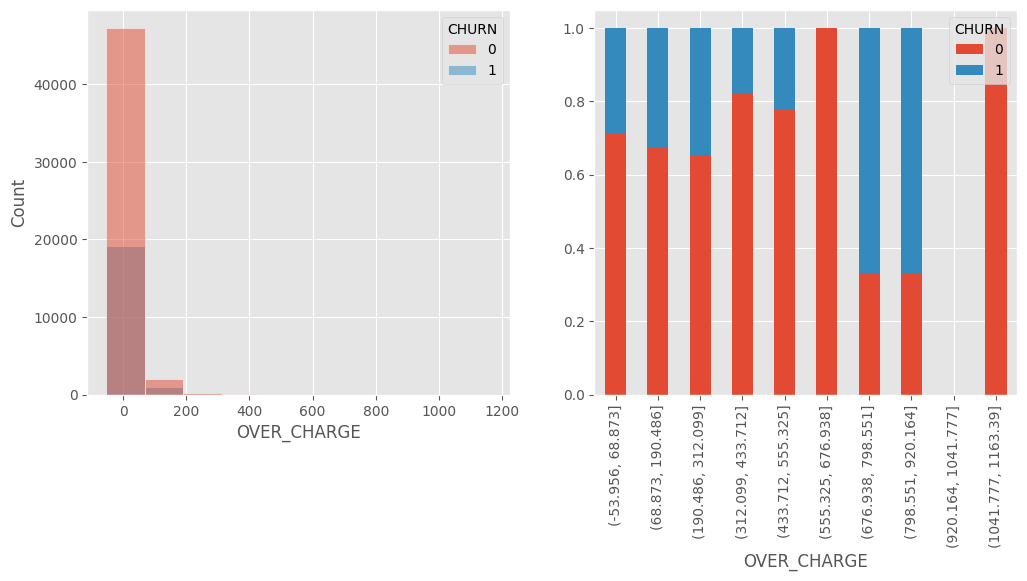

In [35]:
hist_plot('OVER_CHARGE','CHURN')

## *6*. 데이터 세트 분할 및 미사용 변수 제거



In [36]:
X_train = data_na_treat[data_na_treat['CHURNDEP'].isnull() == False].drop(['CUSTOMER','CHURN','CALIBRAT','CHURNDEP','CSA','bin','CREDIT','NEWCELLN'],axis= 1)
X_test = data_na_treat[data_na_treat['CHURNDEP'].isnull() ].drop(['CUSTOMER','CHURN','CALIBRAT','CHURNDEP','CSA','bin','CREDIT','NEWCELLN'],axis= 1)
y_train = data_na_treat[data_na_treat['CHURNDEP'].isnull() == False].CHURN
y_test = data_na_treat[data_na_treat['CHURNDEP'].isnull() ].CHURN

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (39277, 76)
X_test shape:  (30497, 76)
y_train shape:  (39277,)
y_test shape:  (30497,)


In [37]:
X_train.head()

,REVENUE,MOU,RECCHRGE,DIRECTAS,OVERAGE,ROAM,CHANGEM,CHANGER,DROPVCE,BLCKVCE,UNANSVCE,CUSTCARE,THREEWAY,MOUREC,OUTCALLS,INCALLS,PEAKVCE,OPEAKVCE,DROPBLK,CALLFWDV,CALLWAIT,MONTHS,UNIQSUBS,ACTVSUBS,PHONES,MODELS,EQPDAYS,AGE1,AGE2,CHILDREN,CREDITA,CREDITAA,CREDITB,CREDITC,CREDITDE,CREDITGY,CREDITZ,PRIZMRUR,PRIZMUB,PRIZMTWN,REFURB,WEBCAP,TRUCK,RV,OCCPROF,OCCCLER,OCCCRFT,OCCSTUD,OCCHMKR,OCCRET,OCCSELF,OWNRENT,MARRYUN,MARRYYES,MARRYNO,MAILORD,MAILRES,MAILFLAG,TRAVEL,PCOWN,CREDITCD,RETCALLS,RETACCPT,NEWCELLY,REFER,INCMISS,INCOME,MCYCLE,CREDITAD,SETPRCM,SETPRC,RETCALL,FAMILY_CNT,TOTAL_CALLS,OVER_CHARGE,ADDED_SERVICE_CNT
31047,38.00,7.50,38.00,0.00,0.0,0.0,-1.50,0.00,0.00,0.00,0.0,0.00,0.00,0.41,0.33,0.00,1.33,3.67,0.00,0.0,0.00,60,1,1,1.0,1.0,1812.0,26.0,26.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,6,0,0,1,0.00,0,3,0.33,0.00,0
31048,55.23,570.50,71.98,0.00,0.0,0.0,38.50,0.00,9.67,0.67,77.0,8.67,0.00,106.33,14.67,0.67,97.33,90.33,10.33,0.0,0.00,57,1,1,6.0,4.0,434.0,56.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,6,0,2,0,79.99,0,1,15.34,-16.75,0
31049,38.05,682.50,52.49,0.25,0.0,0.0,147.50,-3.06,9.00,1.67,13.0,0.67,0.00,42.20,6.67,0.00,33.33,53.00,10.67,0.0,0.67,53,1,1,3.0,2.0,231.0,28.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,29.99,0,1,6.67,-14.44,1
31050,97.34,1039.00,50.00,4.95,419.5,0.0,198.00,23.26,12.67,3.00,176.0,11.33,0.33,213.85,103.33,0.33,238.33,192.33,15.67,0.0,4.00,55,1,1,3.0,3.0,700.0,38.0,24.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,4,0,3,0,9.99,0,2,103.66,47.34,2
31051,35.30,24.25,34.98,0.00,0.0,0.0,19.75,-0.31,0.00,0.00,1.0,0.00,0.00,2.39,4.00,1.67,9.33,1.67,0.00,0.0,0.00,53,3,3,4.0,3.0,544.0,36.0,34.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,9,0,0,0,79.99,0,3,5.67,0.32,0


In [38]:
print(y_train.head(10))
print(y_train.value_counts())

31047    0
31048    0
31049    0
31050    0
31051    0
31052    0
31053    0
31054    0
31055    0
31056    0
Name: CHURN, dtype: int64
CHURN
1    19662
0    19615
Name: count, dtype: int64


In [39]:
# 변수간의 상관분석
colormap = plt.cm.PuBu
plt.figure(figsize=(40,40))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(X_train.astype(float).corr(), linewidths = 0.1, vmax = 1.0,square = True, cmap = colormap, linecolor = "white", annot = True)

Output hidden; open in https://colab.research.google.com to view.

## *7*. 모델링 및 평가

### 7.1 RandomForest

In [40]:
X_train

,REVENUE,MOU,RECCHRGE,DIRECTAS,OVERAGE,ROAM,CHANGEM,CHANGER,DROPVCE,BLCKVCE,UNANSVCE,CUSTCARE,THREEWAY,MOUREC,OUTCALLS,INCALLS,PEAKVCE,OPEAKVCE,DROPBLK,CALLFWDV,CALLWAIT,MONTHS,UNIQSUBS,ACTVSUBS,PHONES,MODELS,EQPDAYS,AGE1,AGE2,CHILDREN,CREDITA,CREDITAA,CREDITB,CREDITC,CREDITDE,CREDITGY,CREDITZ,PRIZMRUR,PRIZMUB,PRIZMTWN,REFURB,WEBCAP,TRUCK,RV,OCCPROF,OCCCLER,OCCCRFT,OCCSTUD,OCCHMKR,OCCRET,OCCSELF,OWNRENT,MARRYUN,MARRYYES,MARRYNO,MAILORD,MAILRES,MAILFLAG,TRAVEL,PCOWN,CREDITCD,RETCALLS,RETACCPT,NEWCELLY,REFER,INCMISS,INCOME,MCYCLE,CREDITAD,SETPRCM,SETPRC,RETCALL,FAMILY_CNT,TOTAL_CALLS,OVER_CHARGE,ADDED_SERVICE_CNT
31047,38.00,7.50,38.00,0.00,0.0,0.0,-1.50,0.00,0.00,0.00,0.00,0.00,0.00,0.41,0.33,0.00,1.33,3.67,0.00,0.0,0.00,60,1,1,1.0,1.0,1812.0,26.0,26.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,6,0,0,1,0.00,0,3,0.33,0.00,0
31048,55.23,570.50,71.98,0.00,0.0,0.0,38.50,0.00,9.67,0.67,77.00,8.67,0.00,106.33,14.67,0.67,97.33,90.33,10.33,0.0,0.00,57,1,1,6.0,4.0,434.0,56.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,6,0,2,0,79.99,0,1,15.34,-16.75,0
31049,38.05,682.50,52.49,0.25,0.0,0.0,147.50,-3.06,9.00,1.67,13.00,0.67,0.00,42.20,6.67,0.00,33.33,53.00,10.67,0.0,0.67,53,1,1,3.0,2.0,231.0,28.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,29.99,0,1,6.67,-14.44,1
31050,97.34,1039.00,50.00,4.95,419.5,0.0,198.00,23.26,12.67,3.00,176.00,11.33,0.33,213.85,103.33,0.33,238.33,192.33,15.67,0.0,4.00,55,1,1,3.0,3.0,700.0,38.0,24.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,4,0,3,0,9.99,0,2,103.66,47.34,2
31051,35.30,24.25,34.98,0.00,0.0,0.0,19.75,-0.31,0.00,0.00,1.00,0.00,0.00,2.39,4.00,1.67,9.33,1.67,0.00,0.0,0.00,53,3,3,4.0,3.0,544.0,36.0,34.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,9,0,0,0,79.99,0,3,5.67,0.32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71042,117.49,384.00,29.99,0.00,250.0,0.0,0.00,0.00,4.00,1.00,27.00,0.00,0.00,21.70,1.33,0.00,99.33,54.33,5.00,0.0,0.00,30,1,1,2.0,2.0,489.0,22.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,29.99,0,1,1.33,87.50,0
71043,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,2.00,1.67,0.00,0.0,0.00,25,1,1,1.0,1.0,773.0,34.0,26.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,6,0,0,1,0.00,0,2,0.00,0.00,0
71044,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,9.33,2.67,48.33,0.00,0.00,58.92,17.00,1.33,160.33,33.33,12.00,0.0,0.33,29,1,1,2.0,2.0,526.0,68.0,64.0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,6,0,0,0,59.99,0,2,18.33,0.00,1
71045,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.32,0.67,0.33,5.33,3.33,0.00,0.0,0.00,25,1,1,1.0,1.0,773.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,8,0,1,1,0.00,0,0,1.00,0.00,0


In [41]:
# Random Forest 모델적용

model_RF = RandomForestClassifier(n_estimators = 1000, random_state=0) # 기본 반복횟수 및 랜덤 시드 등 옵션 선택하여 분류기 생성
model_RF.fit(X_train, y_train) # 학습용 데이터 지정하여 학습

RF_y_pred = model_RF.predict(X_test) # 학습된 모형에 확인용 데이터 (test_datase)를 넣어 예측값 생성

RF_result = pd.DataFrame({'pred' : RF_y_pred, 'real' : y_test}) #정확도 평가를 위해 예측값과 실제값을 하나의 dataframe 에 생성

RF_result.head(10) #확인

,pred,real
0,0,0
1,0,0
2,1,0
3,0,0
4,1,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


Model accuracy : 0.5952
[[17783 12122]
 [  222   370]]
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     29905
           1       0.03      0.62      0.06       592

    accuracy                           0.60     30497
   macro avg       0.51      0.61      0.40     30497
weighted avg       0.97      0.60      0.73     30497

test_AUC :  0.6550653646457023


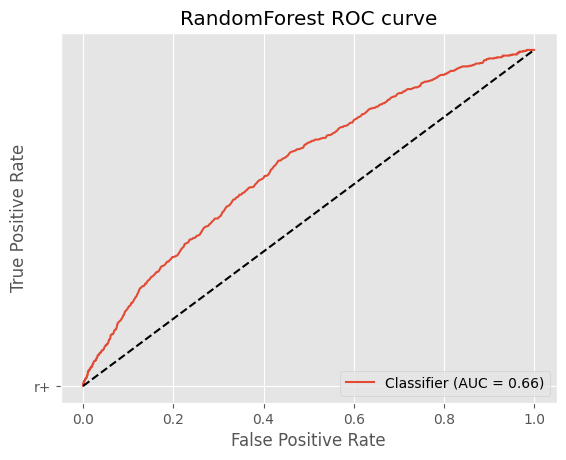

In [42]:
# 정확도 확인
# confusion matrix 확인
print('Model accuracy : {0:0.4f}'. format(accuracy_score(y_test, RF_y_pred)))
print(confusion_matrix(y_test, RF_y_pred))
print(classification_report(y_test, RF_y_pred))
print("test_AUC : ", metrics.roc_auc_score(y_test, model_RF.predict_proba(X_test)[:,1]))

# ROC 그래프
RocCurveDisplay.from_predictions(y_test,model_RF.predict_proba(X_test)[:,1])
plt.plot([0,1], [0,1], "k--", "r+")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest ROC curve')
plt.show()

In [43]:
feature_scores = pd.Series(model_RF.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores.head(10)

EQPDAYS        0.056990
CHANGEM        0.046333
MOU            0.043956
MONTHS         0.043194
OVER_CHARGE    0.039729
CHANGER        0.039375
REVENUE        0.038673
PEAKVCE        0.034644
OPEAKVCE       0.034120
MOUREC         0.033783
dtype: float64

### 7.2 Logstic Regession

In [44]:
# from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression()
model_LR.fit(X_train_scaled, y_train)

LR_y_pred = model_LR.predict(X_test)

LR_result = pd.DataFrame({'pred' : LR_y_pred, 'real' : y_test})

LR_result.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,pred,real
0,0,0
1,0,0
2,1,0
3,1,0
4,1,0


Model accuracy : 0.3379
[[ 9837 20068]
 [  125   467]]
              precision    recall  f1-score   support

           0       0.99      0.33      0.49     29905
           1       0.02      0.79      0.04       592

    accuracy                           0.34     30497
   macro avg       0.51      0.56      0.27     30497
weighted avg       0.97      0.34      0.48     30497

test_AUC :  0.5753695825067671


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


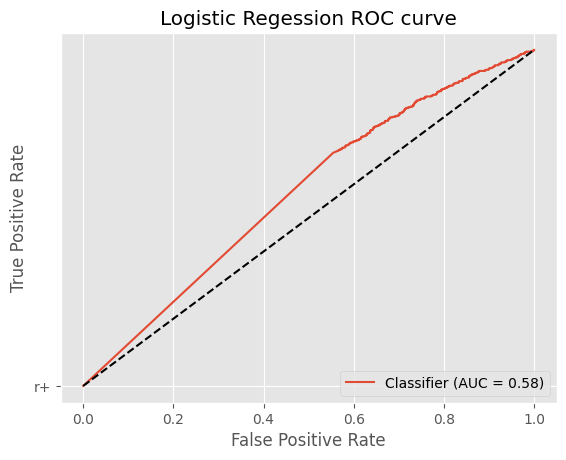

In [45]:
print('Model accuracy : {0:0.4f}'. format(accuracy_score(y_test, LR_y_pred)))
print(confusion_matrix(y_test, LR_y_pred))
print(classification_report(y_test, LR_y_pred))
print("test_AUC : ", metrics.roc_auc_score(y_test, model_LR.predict_proba(X_test)[:,1]))

# ROC 그래프
RocCurveDisplay.from_predictions(y_test,model_LR.predict_proba(X_test)[:,1])
plt.plot([0,1], [0,1], "k--", "r+")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regession ROC curve')
plt.show()

In [46]:
# 입력 변수의 Coefficent (변수별 영향력)
model_LR.coef_

array([[ 2.04286471e-02, -1.45257156e-01, -4.78810589e-02,
        -4.45696488e-03,  6.29346636e-02,  5.83228681e-02,
        -1.26469009e-01,  9.11235163e-02,  9.98241719e-02,
         6.48433306e-02,  3.46845323e-02, -3.01906145e-02,
        -2.63138140e-02,  2.81623489e-02,  3.68889801e-02,
        -5.83072680e-02, -6.31599079e-02, -1.87780844e-02,
        -4.20808669e-02, -5.38696837e-04,  1.18285088e-02,
        -1.95975443e-01,  2.48886002e-01, -1.36621574e-01,
         6.68616867e-02,  1.37756549e-02,  3.72903544e-01,
        -1.04701544e-01, -6.89671108e-02, -1.21249394e-02,
         5.97163563e-03,  4.01688529e-02,  3.85300828e-02,
        -2.82289943e-02, -8.71847151e-02,  1.41840558e-03,
         1.61228146e-03,  1.22606598e-02, -1.99064034e-02,
         1.34926629e-02,  8.00204697e-02, -4.59952462e-02,
         9.09226002e-03,  2.05204361e-03, -8.60236844e-03,
         6.02955291e-03, -4.02527523e-03,  9.91900622e-03,
         1.53519003e-02, -6.16325151e-04, -7.60087962e-0

In [47]:
range(0,X_train.shape[0])

range(0, 39277)

### 7.3 XGBoos

In [48]:
#import xgboost as xgb
XGB_model = xgb.XGBClassifier(booster='gbtree',
                              colsample_bylevel=0.9,
                              colsample_bytree=0.8,
                              gamma=0,
                              max_depth=8,
                              min_child_weight=3,
                              n_estimators=50,
                              nthread=8,
                              objective='binary:logistic',
                              random_state=2,
                              silent= True)



XGB_model.fit(X_train,y_train, eval_set=[(X_test,y_test)],early_stopping_rounds=50, eval_metric ='auc')

XGB_y_pred  = XGB_model.predict(X_test)

XGB_result = pd.DataFrame({'pred' : XGB_y_pred, 'real' : y_test})

XGB_result.head(5)



/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.62380
[1]	validation_0-auc:0.63876
[2]	validation_0-auc:0.63946


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:33:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[3]	validation_0-auc:0.64260
[4]	validation_0-auc:0.64519
[5]	validation_0-auc:0.64356
[6]	validation_0-auc:0.64509
[7]	validation_0-auc:0.64394
[8]	validation_0-auc:0.64445
[9]	validation_0-auc:0.64370
[10]	validation_0-auc:0.64568
[11]	validation_0-auc:0.64540
[12]	validation_0-auc:0.64588
[13]	validation_0-auc:0.64632
[14]	validation_0-auc:0.64647
[15]	validation_0-auc:0.64549
[16]	validation_0-auc:0.64434
[17]	validation_0-auc:0.64346
[18]	validation_0-auc:0.64120
[19]	validation_0-auc:0.64041
[20]	validation_0-auc:0.64026
[21]	validation_0-auc:0.64068
[22]	validation_0-auc:0.63946
[23]	validation_0-auc:0.63911
[24]	validation_0-auc:0.64109
[25]	validation_0-auc:0.64032
[26]	validation_0-auc:0.64055
[27]	validation_0-auc:0.64152
[28]	validation_0-auc:0.64115
[29]	validation_0-auc:0.64024
[30]	validation_0-auc:0.64050
[31]	validation_0-auc:0.64099
[32]	validation_0-auc:0.64217
[33]	validation_0-auc:0.64198
[34]	validation_0-auc:0.64162
[35]	validation_0-auc:0.64069
[36]	validation_0

,pred,real
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0


Model accuracy : 0.5923
[[17698 12207]
 [  228   364]]
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     29905
           1       0.03      0.61      0.06       592

    accuracy                           0.59     30497
   macro avg       0.51      0.60      0.40     30497
weighted avg       0.97      0.59      0.73     30497

test_AUC :  0.6464691681315156


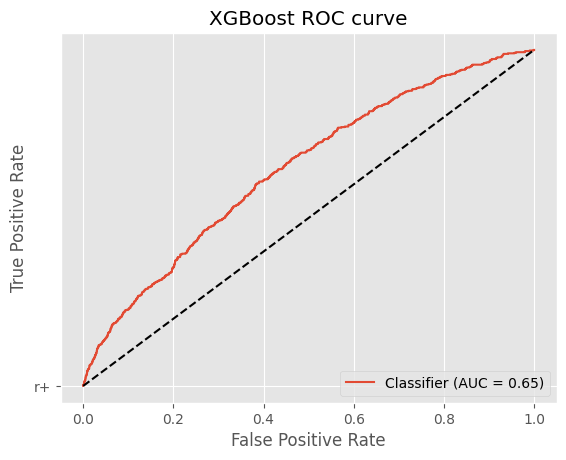

In [49]:
print('Model accuracy : {0:0.4f}'. format(accuracy_score(y_test, XGB_y_pred)))
print(confusion_matrix(y_test, XGB_y_pred))
print(classification_report(y_test, XGB_y_pred))
print("test_AUC : ", metrics.roc_auc_score(y_test, XGB_model.predict_proba(X_test)[:,1]))

# ROC 그래프
RocCurveDisplay.from_predictions(y_test,XGB_model.predict_proba(X_test)[:,1])
plt.plot([0,1], [0,1], "k--", "r+")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC curve')
plt.show()

Text(0.5, 0, 'Xgboost Feature Importance')

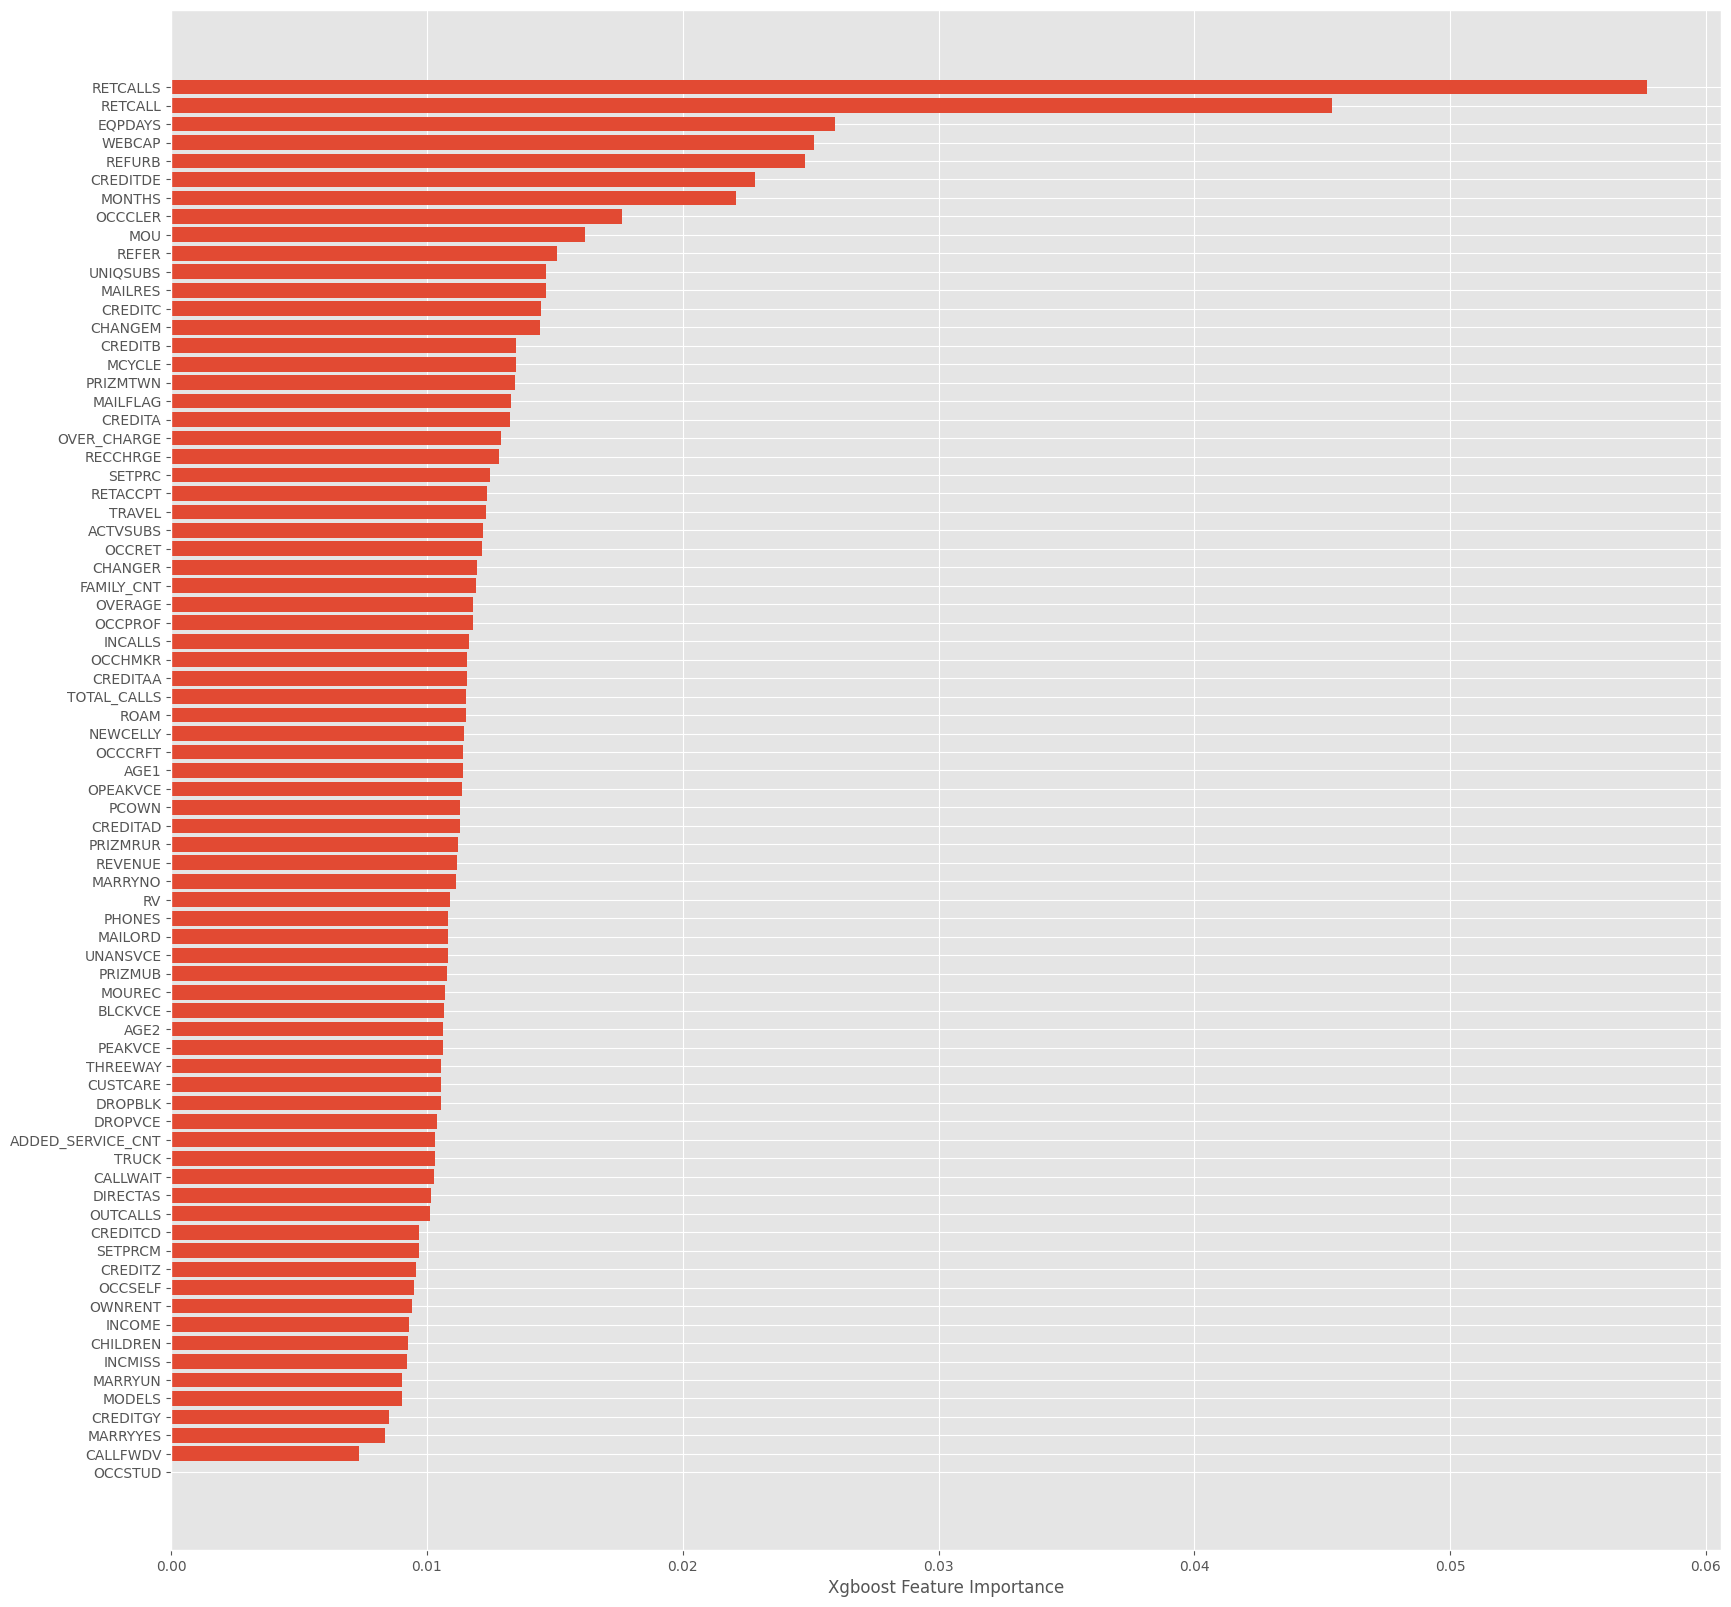

In [50]:
plt.figure(figsize=(20,20))
sorted_idx = XGB_model.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], XGB_model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")